In [1]:
# Render our plots inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

#train = pd.read_csv('/Users/Kseniya/diplom/src/text_preprocess/linis_csv/all.csv')
linis = pd.read_csv('/Users/Kseniya/diplom/src/text_preprocess/linis_senti_csv/senti_all.csv')
print linis.shape
print "======="
news = pd.read_csv('/Users/Kseniya/diplom/src/text_preprocess/news_data_csv/news_all.csv')
print news.shape

(3175, 52132)
(655, 52132)


In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def draw_roc_for_n_class(fpr, tpr, roc_auc, classes, func_name):        
    # Plot of a ROC curve for a specific class - "positive"
    plt.figure()
    if 'macro' in fpr.keys():
        plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             linewidth=2)
    if 'micro' in fpr.keys():
        plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             linewidth=2) 
        
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=classes[i] + ': ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(func_name)
    plt.legend(loc="lower right")
    plt.show()
    
def roc_auc_draw(classes, y_test, class_labels = ['negative', 'neitral', 'positive'] ):
    for c in classes:
        y_score = c['y_score']
        if y_score is None:
            continue
            
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        # Compute ROC curve and ROC area for each class
        for i in range(y_test.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"]) 
        
        # draw plots
        draw_roc_for_n_class(fpr, tpr, roc_auc, class_labels, c['type'])  
        
def draw_prec_recall_for_n_classes(recall, precision, average_precision, class_names, func_name):
    plt.figure()
    plt.plot(recall["micro"], precision["micro"],
                 label='micro-average Precision-recall curve (area = {0:0.2f})'
                       ''.format(average_precision["micro"]))
    
    for i in range(len(class_names)):
        print i
        plt.plot(recall[i], precision[i],
                 label=class_names[i] + 'Precision-recall curve of class (area = {})'
                           ''.format(average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Extension of Precision-Recall curve to multi-class for ' + func_name)
    plt.legend(loc="lower right")
    plt.show()

def prec_recall_draw(classes, y_test, class_labels=['negative', 'neitral', 'positive']):
    for c in classes:
        y_score = c['y_score']
        if y_score is None:
            continue 
        # Compute Precision-Recall and plot curve
        precision = dict()
        recall = dict()
        average_precision = dict()
        for i in range(y_test.shape[1]):
            precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                                y_score[:, i])
            average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

        # Compute micro-average ROC curve and ROC area
        precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
                                                                        y_score.ravel())
        average_precision["micro"] = average_precision_score(y_test, y_score,
                                                             average="micro")
       
        # Plot Precision-Recall curve for each class
        draw_prec_recall_for_n_classes(recall, precision, average_precision, class_labels, c['type'])

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, target_names=['neitral', 'positive', 'negative']):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def metrics_for_classifier(y_true_bin, y_pred_bin): 
    y_true = np.argmax(y_true_bin, axis=1)
    y_pred = np.argmax(y_pred_bin, axis=1)

    print "Accurancy"
    print accuracy_score(y_true, y_pred)
    
    print "Precision/Recall/F-measure micro"
    print precision_recall_fscore_support(y_true, y_pred, average='micro')
    print "Precision/Recall/F-measure macro"
    print precision_recall_fscore_support(y_true, y_pred, average='macro')
    
    cm = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)
    print cm
    plot_confusion_matrix(cm, title='Confusion matrix')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    print(cm_normalized)

def metrics_for_n_classifiers(classes, y_test):
    for c in classes:
        y_score = c['y_score']
        if y_score is None:
            continue
            
        print c['type']
        metrics_for_classifier(y_test, c['y_score'])
    

In [4]:
def examine_for_n_classifiers(classes, y_test, class_labels=['negative', 'neitral', 'positive']):
    print "Metrics"
    metrics_for_n_classifiers(classes, y_test)
    
    print "Precision/Recall"
    prec_recall_draw(classes, y_test, class_labels)
    
    print "ROC draw"
    roc_auc_draw(classes, y_test, class_labels)
    
def examine_one_classifier(y_score, y_test, name, class_labels=['negative', 'neitral', 'positive']):
    classes = [{'y_score': y_score, 'type': name}]
    
    examine_for_n_classifiers(classes, y_test, class_labels)

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize

def split_data(ttv_data, x_names, y_names, test_size):
    X1, X2, Y1, Y2 = train_test_split(ttv_data[x_names[0]], ttv_data[y_names[0]], test_size=test_size, random_state=0)
    
    ttv_data[x_names[1]] = X1
    ttv_data[x_names[2]] = X2
    ttv_data[y_names[1]] = Y1
    ttv_data[y_names[2]] = Y2

    
def binarize_rename(ttv_data, name, rename_classes):
    if rename_classes:
        ttv_data[name + '_bin'] = label_binarize(ttv_data[name], classes=[0, 1, 2])
    else:
        ttv_data[name + '_bin'] = label_binarize(ttv_data[name], classes=[-1, 0, 1])

def prepare_train_test_valid_data(res_data, binarize, rename_classes, valid_size, control_size, test_size):
    ttv_data = {}
    
    ttv_data['X_all'] = res_data['X'].copy()
    ttv_data['Y_all'] = res_data['Y'].copy()
        
    if rename_classes is True:
        ttv_data['Y_all'][ttv_data['Y_all'] == -1] = 2
    
    x_cur = 'X_all'
    y_cur = 'Y_all'
    
    if valid_size != 0:
        split_data(ttv_data, [x_cur, 'X_tt', 'X_valid'], [y_cur,'Y_tt', 'Y_valid'], valid_size)
        x_cur = 'X_tt'
        y_cur = 'Y_tt'
        
        print 'Valid split: '
        print ttv_data['X_valid'].shape
        print ttv_data['Y_valid'].shape
        
        if binarize:
            binarize_rename(ttv_data, 'Y_valid', rename_classes)
            print ttv_data['Y_valid_bin'].shape
        
    if control_size != 0:
        split_data(ttv_data, [x_cur, 'X_train_test', 'X_control'], [y_cur,'Y_train_test', 'Y_control'], control_size)
        x_cur = 'X_train_test'
        y_cur = 'Y_train_test'
        
        print 'Control split: '
        print ttv_data['X_control'].shape
        print ttv_data['Y_control'].shape
        
        if binarize:
            binarize_rename(ttv_data, 'Y_control', rename_classes)
            print ttv_data['Y_control_bin'].shape
        
    if test_size != 0:
        split_data(ttv_data, [x_cur, 'X_train', 'X_test'], [y_cur,'Y_train', 'Y_test'], test_size)
        
        print 'Train: '
        print ttv_data['X_train'].shape
        print ttv_data['Y_train'].shape
        if binarize:
            binarize_rename(ttv_data, 'Y_train', rename_classes)
            print ttv_data['Y_train_bin'].shape
        
        print 'Test: '
        print ttv_data['X_test'].shape
        print ttv_data['Y_test'].shape
        if binarize:
            binarize_rename(ttv_data, 'Y_test', rename_classes)
            print ttv_data['Y_test_bin'].shape
        
    return ttv_data

In [6]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# prepare data
def target_three_classes(target_col):
    target_res = pd.Series()
    for row in target_col:
        if row == -1 or row == 0 or row == 1:
            target_res.loc[len(target_res)] = row
            continue
        if row < -1:
            target_res.loc[len(target_res)] = -1
        else:
            target_res.loc[len(target_res)] = 1
    return target_res

def data_preprocess(data):
    # Nan -> 0
    new_data = data.fillna(0)
    return new_data

def prepare_data(data):
    print "targets -> 3 classes"
    data_targets = target_three_classes(data['target'])
    data.drop('target', axis=1, inplace=True)
    assert(len(data_targets.unique()) == 3)
    print "fillna with 0"
    data = data_preprocess(data)
    
    print 'X '
    print data.shape
    print 'Y '
    print data_targets.shape
    
    return {'X': data, 'Y': data_targets}


In [7]:
from sklearn.utils import shuffle

def form_same_percentage_for_class(data_1, data_2):    
    eq_data = {}
    eq_data['pos_x'] = pd.DataFrame()
    eq_data['pos_y'] = pd.Series()
    
    eq_data['neg_x'] = pd.DataFrame()
    eq_data['neg_y'] = pd.Series()
    
    eq_data['nei_x'] = pd.DataFrame()
    eq_data['nei_y'] = pd.Series()
    
    for data in  [data_1, data_2]:
        index = 0    
        for row in data_1['target']:
            if index % 50 == 0:
                print index
                
            if row == 1:
                eq_data['pos_x'] = eq_data['pos_x'].append(data.iloc[[index]])
                eq_data['pos_y'] = eq_data['pos_y'].append(pd.Series(row))
            if row == 0:
                eq_data['nei_x'] = eq_data['nei_x'].append(data.iloc[[index]])
                eq_data['nei_y'] = eq_data['nei_y'].append(pd.Series(row))
            if row == 2:
                eq_data['neg_x'] = eq_data['neg_x'].append(data.iloc[[index]])
                eq_data['neg_y'] = eq_data['neg_y'].append(pd.Series(row))
            
            index += 1
        
    print 'pos '
    print eq_data['pos_x'].shape
    print eq_data['pos_y'].shape
    
    print 'neitral'
    print eq_data['nei_x'].shape
    print eq_data['nei_y'].shape
    
    print "neg "
    print eq_data['neg_x'].shape
    print eq_data['neg_y'].shape

    # min
    min_cnt = eq_data['pos_x'].shape[0] 
    if eq_data['nei_x'].shape[0]  < min_cnt:
        min_cnt = eq_data['nei_x'].shape[0]
    if eq_data['neg_x'].shape[0]  < min_cnt:
        min_cnt = eq_data['neg_x'].shape[0]
        
    res_x = eq_data['pos_x'][:min_cnt]
    res_x = res_x.append(eq_data['nei_x'][:min_cnt])
    res_x = res_x.append(eq_data['neg_x'][:min_cnt])
    
    res_y = eq_data['pos_y'][:min_cnt]
    res_y = res_y.append(eq_data['nei_y'][:min_cnt])
    res_y = res_y.append(eq_data['neg_y'][:min_cnt])
    
    print "result"
    print res_x.shape
    print res_y.shape
    
    return {'X': res_x, 'Y': res_y}

def prepare_all_data(all_data):
    all_data = shuffle(all_data, random_state=157)
    all_data = prepare_data(all_data)
    
    return all_data

def join_and_prepare_data(data_1, data_2):
    all_data = data_1.copy()
    all_data = all_data.append(data_2)
    
    return prepare_all_data(all_data)


In [8]:
#data = form_same_percentage_for_class(linis, news)
data = join_and_prepare_data(linis, news)
print "split data to sets"

res_data = prepare_train_test_valid_data(data, True, True, 0.1, 0.15, 0.2)

targets -> 3 classes


/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


fillna with 0
X 
(3830, 52131)
Y 
(3830,)
split data to sets
Valid split: 
(383, 52131)
(383,)
(383, 3)
Control split: 
(518, 52131)
(518,)
(518, 3)
Train: 
(2343, 52131)
(2343,)
(2343, 3)
Test: 
(586, 52131)
(586,)
(586, 3)


In [9]:
# classification into 3 classes
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.linear_model import BayesianRidge, LinearRegression,LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

classifiers = [
    {'type': "random_forest", 'classifier': RandomForestClassifier, 'params': {'n_estimators': 1000, 'n_jobs': 4}, 'y_score': np.array([])}, 
    {'type': "ada boost", 'classifier': AdaBoostClassifier, 'params': {'n_estimators': 15}, 'y_score': np.array([])},
    {'type': "logistic regression", 'classifier': LogisticRegression, 'params': {
                                                                        'solver': 'newton-cg',
                                                                        'multi_class': 'ovr',
                                                                        'n_jobs': 4}},
    {'type': "liner regression", 'classifier': LinearRegression, 'params': {
                                                                    'copy_X': True,
                                                                    'normalize': True,
                                                                    'n_jobs': 4}},
    #{'type': "bayes ridge", 'classifier': BayesianRidge, 'params': {}},
    #{'type': "svm linear", 'classifier': svm.SVC, 'params': {'kernel': 'linear' }},
    #{'type': "svm poly 3", 'classifier': svm.SVC, 'params': {'kernel': 'poly', 'degree': 3 }},
    #{'type': "svm poly 2", 'classifier': svm.SVC, 'params': {'kernel': 'poly', 'degree': 2 }}, 
    #{'type': "svm linear", 'classifier': svm.SVC, 'params': {'kernel': 'sigmoid', 'coef0': 1 }}, 
]

def get_y_score_for_classifiers(classes, res_data):
    for c in classes:
        params = dict(c.get('params', {}))
        classifier = c['classifier']
        
        print "classifier " + c['type']
        classifier = OneVsRestClassifier(classifier(**params))
        #y_score = cross_validation.cross_val_predict(classifier, res_data['X_all'], res_data['Y_all'], n_jobs=4, cv=3)
        y_score = classifier.fit(res_data['X_train'], res_data['Y_train_bin']).predict(res_data['X_test'])
        print y_score.shape
        c['y_score'] = y_score


In [ ]:
get_y_score_for_classifiers(classifiers, res_data)

classifier random_forest


Metrics
random_forest
Accurancy
0.752559726962
Precision/Recall/F-measure micro
(0.75255972696245732, 0.75255972696245732, 0.75255972696245732, None)
Precision/Recall/F-measure macro
(0.79255050505050517, 0.47778665657287855, 0.51375127597027137, None)
[[393   2   8]
 [ 51   8   0]
 [ 84   0  40]]
ada boost
Accurancy
0.684300341297
Precision/Recall/F-measure micro
(0.68430034129692829, 0.68430034129692829, 0.68430034129692829, None)
Precision/Recall/F-measure macro
(0.49451337193272682, 0.36991981046108985, 0.34893646314231619, None)
[[390   6   7]
 [ 52   6   1]
 [116   3   5]]
logistic regression
Accurancy
0.720136518771
Precision/Recall/F-measure micro
(0.72013651877133111, 0.72013651877133111, 0.72013651877133111, None)
Precision/Recall/F-measure macro
(0.68428817600264391, 0.43677713756992054, 0.45513945136867567, None)
[[386   1  16]
 [ 43   7   9]
 [ 94   1  29]]
liner regression
Accurancy
0.569965870307
Precision/Recall/F-measure micro
(0.56996587030716728, 0.56996587030716728,

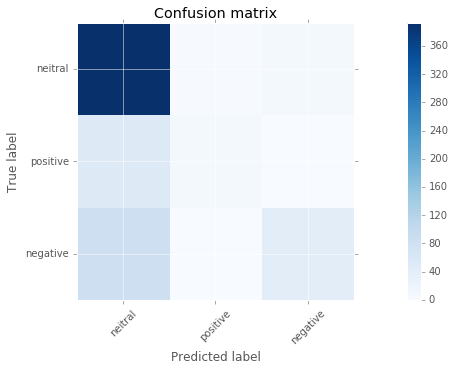

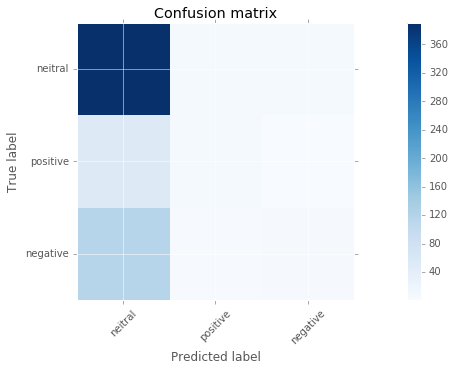

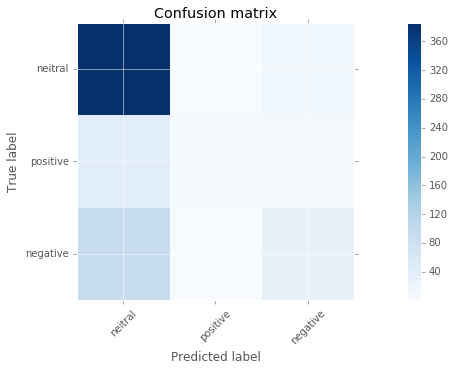

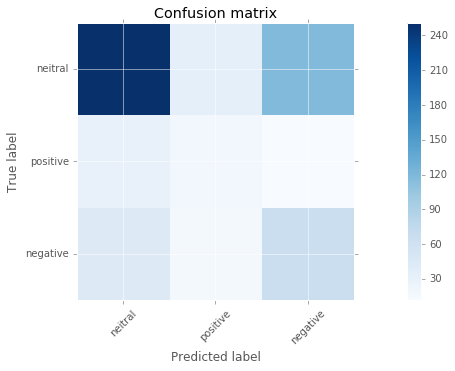

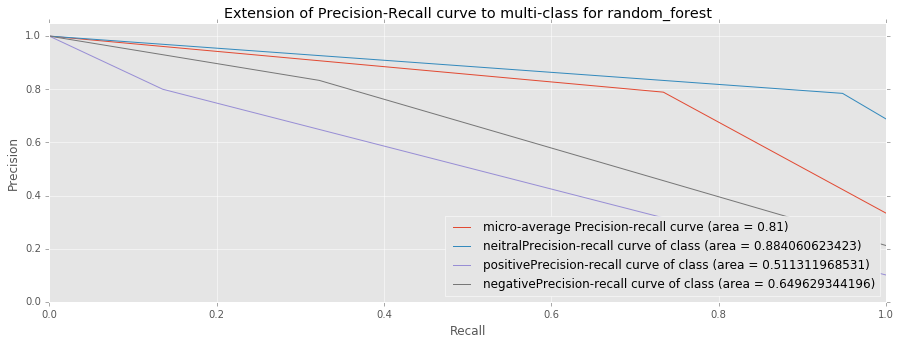

0
1
2


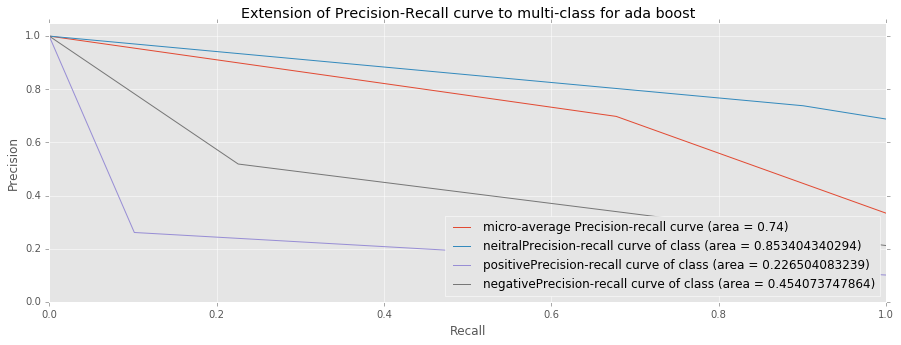

0
1
2


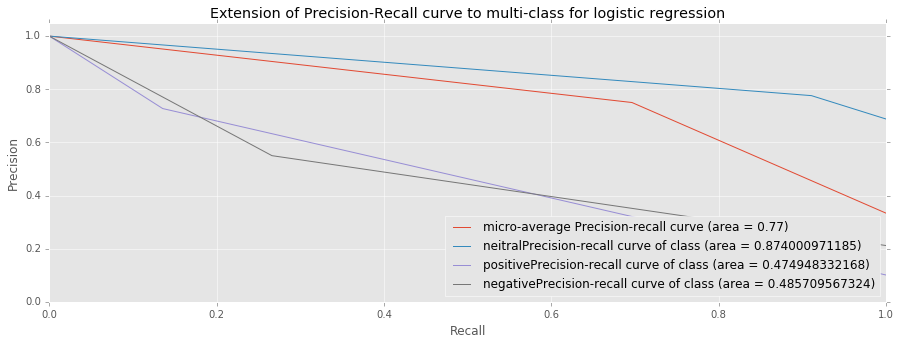

0
1
2


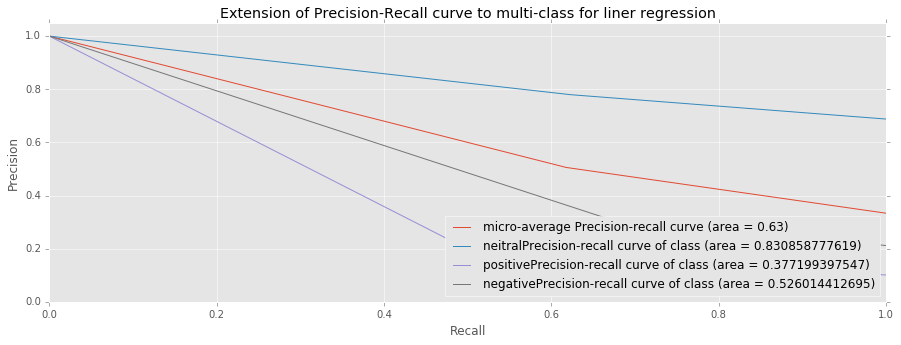

ROC draw


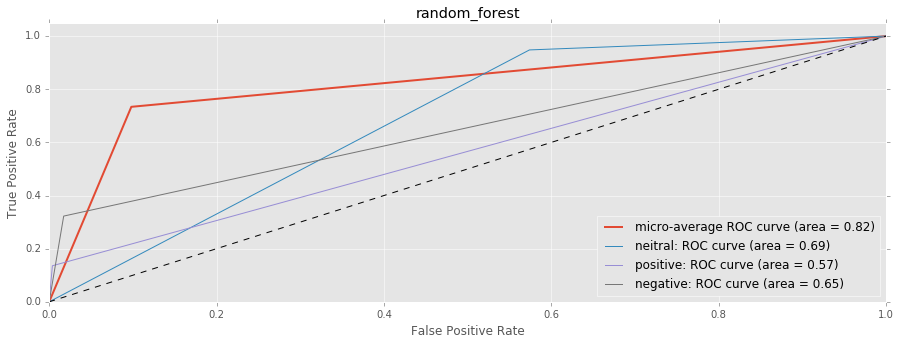

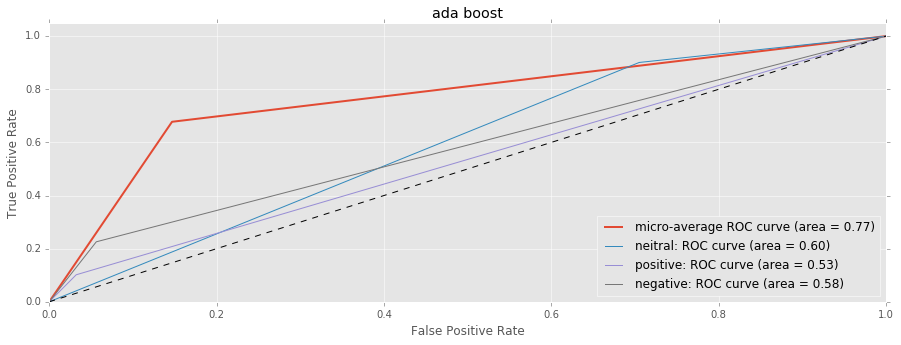

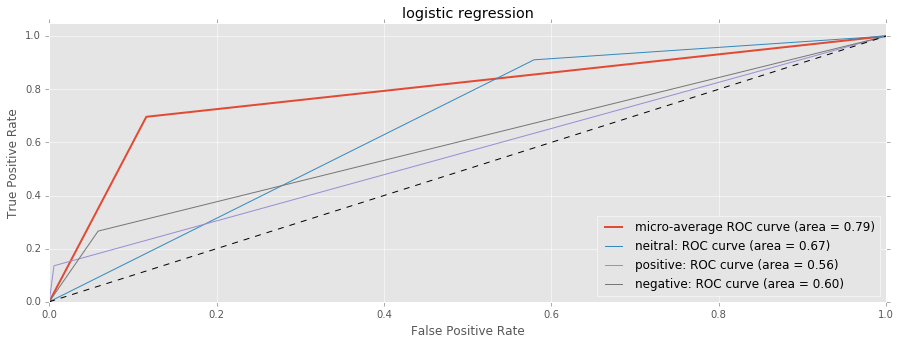

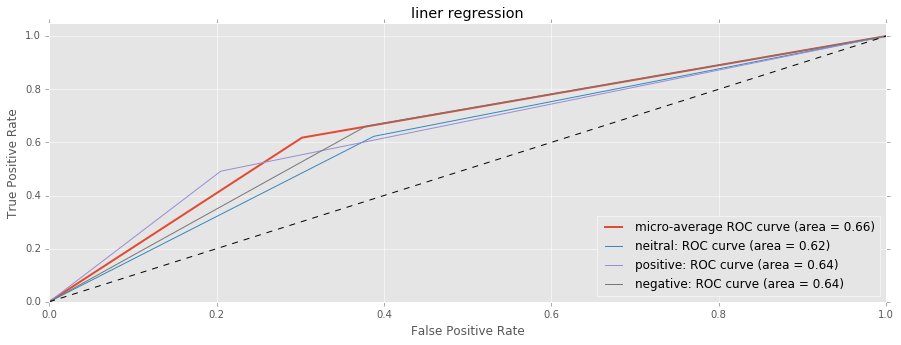

In [26]:
examine_for_n_classifiers(classifiers, res_data['Y_test_bin'], class_labels=['neitral', 'positive', 'negative'])

In [9]:
import xgboost
from sklearn.cross_validation import train_test_split

def get_y_score_for_xgboost(res_data):
    # base params
    #params = {
    #   'max_depth': 6,
    #   'max_delta_step': 5,
    #    'base_score': 0.7,
    #    'n_estimators': 100,
    #    'min_child_weight': 1,
    #    'learning_rate': 0.02,
    #    'subsample': 0.7,
    #    'colsample_bytree': 0.6,
    #    'scale_pos_weight': 0.5
    #}  
    #f1 0.800417972832 (linis data + hyperopt)
    #params = {'colsample_bytree': 0.9169189922400668, 
    #        'scale_pos_weight': 0.9683869928314955, 
    #        'learning_rate': 0.027495603871745655,
    #        'max_delta_step': 7.0, 
    #        'base_score': 0.8087821074618209,
    #        'n_estimators': 7760.0, 
    #        'subsample': 0.7457826694051857, 
    #        'min_child_weight': 2.0, 
    #        'max_depth': 6.0}
    #linis + news (train, test=0.2, control=0.2, validation = 0.1) + shuffle
    #f1 0.712793733681
    #params = {'colsample_bytree': 0.8739318954339452,
    #          'scale_pos_weight': 0.4289114679603036,
    #          'learning_rate': 0.029615283967692307,
    #          'max_delta_step': 5.0,
    #         'base_score': 0.6885591408906166,
    #         'n_estimators': 2346.0,
    #          'subsample': 0.8785876742391446,
    #          'min_child_weight': 9.0,
    #          'max_depth': 5.0}
    #inis + news (train, test=0.2, control=0.2, validation = 0.1) + shuffle
    #f1 0.747104247104 
    params = {
        'colsample_bytree': 0.4584354394074189,
        'scale_pos_weight': 0.4146078206511208,
        'learning_rate': 0.8012005033928764,
        'max_delta_step': 6.0,
        'base_score': 0.4534542233813451,
        'n_estimators': 24607.0,
        'subsample': 0.6993721376017847,
        'min_child_weight': 2.0,
        'max_depth': 6.0
    }

    xgb_clf = xgboost.XGBClassifier(missing=np.nan, nthread=4, seed=13, 
                                 n_estimators=int(params['n_estimators']),
                                 base_score=params['base_score'],
                                 max_depth=int(params['max_depth']),
                                 max_delta_step=int(params['max_delta_step']),
                                 min_child_weight=params['min_child_weight'],
                                 learning_rate=params['learning_rate'],
                                 subsample=params['subsample'],
                                 scale_pos_weight=params['scale_pos_weight'],
                                 colsample_bytree=params['colsample_bytree'])

    # 30
    print "fitting the model ... "
    xgb_clf.fit(res_data['X_train'], res_data['Y_train'], eval_metric=['mlogloss', 'merror'], eval_set=[(res_data['X_test'], res_data['Y_test'])], early_stopping_rounds=30)
    
    print "prediction.."
    y_score = xgb_clf.predict_proba(res_data['X_control'])
    pred_class = np.argmax(y_score, axis=1)
    
    return {'y_score': pred_class, 'clf_obj': xgb_clf, 'y_score_multi': y_score}
    

Metrics
xgboost
Accurancy
0.747104247104
Precision/Recall/F-measure micro
(0.74710424710424705, 0.74710424710424705, 0.74710424710424705, None)
Precision/Recall/F-measure macro
(0.64805003823028529, 0.54102952501170998, 0.5717606812331556, None)
[[321  15  11]
 [ 32  13   5]
 [ 64   4  53]]
Normalized confusion matrix
[[ 0.93  0.04  0.03]
 [ 0.64  0.26  0.1 ]
 [ 0.53  0.03  0.44]]
Precision/Recall
0
1
2


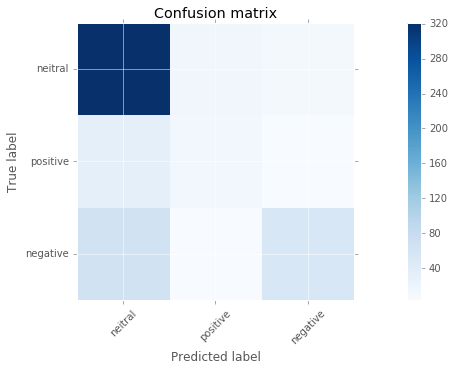

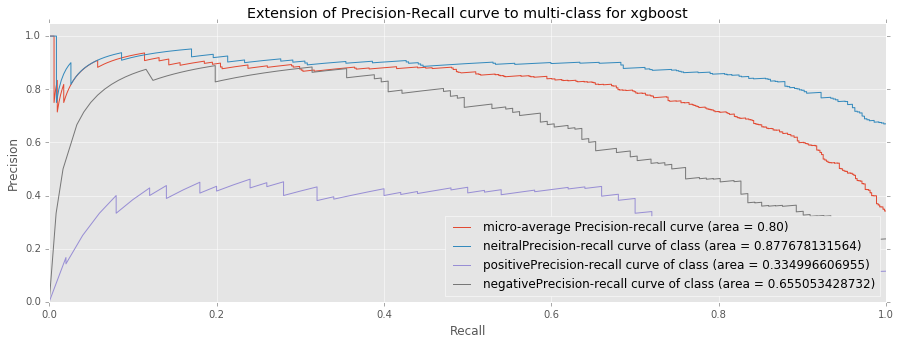

ROC draw


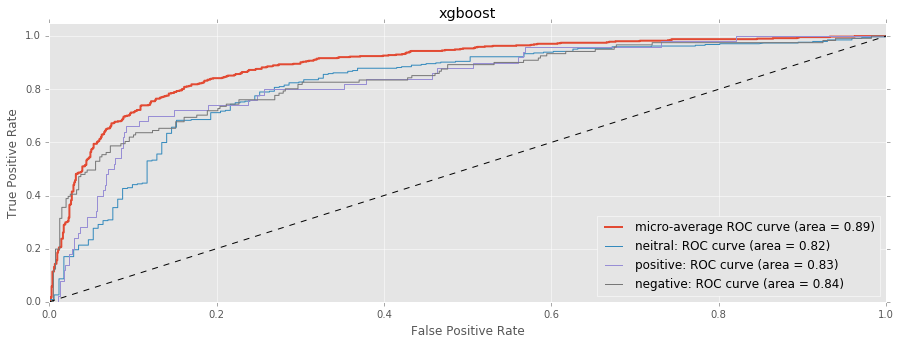

In [12]:
linis_news_res = get_y_score_for_xgboost(res_data)
examine_one_classifier(linis_news_res['y_score_multi'], res_data['Y_control_bin'], 'xgboost', class_labels=['neitral', 'positive', 'negative'])


In [76]:
xgboost_result['y_score_multi'] = xgboost_result['clf_obj'].predict_proba(test)


0
1
2


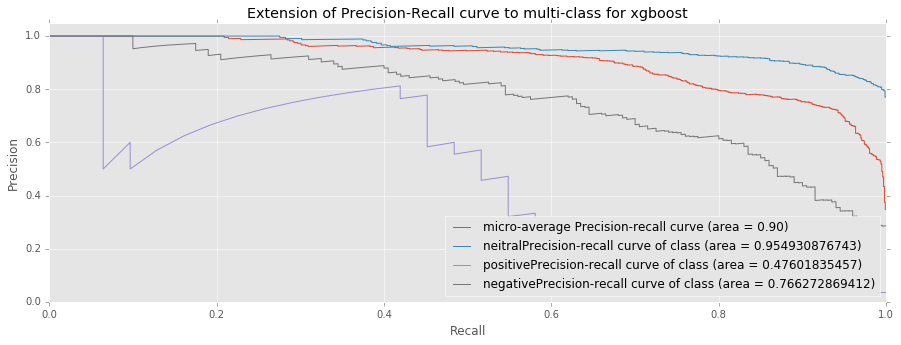

In [81]:
xgboost_classifier = [{'type': 'xgboost', 'y_score': xgboost_result['y_score_multi']}]
prec_recall_draw(xgboost_classifier, label_binarize(xgboost_result['y_test'], classes=[0, 1, 2]), class_labels=['neitral', 'positive', 'negative'])

In [20]:
import pickle

type(linis_news_res['clf_obj'])
f = open('/Users/Kseniya/diplom/src/text_preprocess/sentitrigram_linis_news_xgboost_clf.obj_model', 'w')
pickle.dump(linis_news_res['clf_obj'], file=f, protocol=pickle.HIGHEST_PROTOCOL)
f.close()

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import f1_score

def xgboost_objective(params):
    xgb_clf = xgb.XGBClassifier(missing=np.nan, nthread=4, seed=13, 
                                 n_estimators=int(params['n_estimators']),
                                 base_score=params['base_score'],
                                 max_depth=int(params['max_depth']),
                                 max_delta_step=int(params['max_delta_step']),
                                 min_child_weight=params['min_child_weight'],
                                 learning_rate=params['learning_rate'],
                                 subsample=params['subsample'],
                                 scale_pos_weight=params['scale_pos_weight'],
                                 colsample_bytree=params['colsample_bytree'])

    xgb_clf.fit(res_data['X_train'], res_data['Y_train'], eval_metric=['mlogloss', 'merror'], eval_set=[(res_data['X_test'], res_data['Y_test'])], early_stopping_rounds=30)
    dpred = xgb_clf.predict_proba(res_data['X_control'])
    
    pred_class = np.argmax(dpred, axis=1)
    
    f1 = f1_score(res_data['Y_control'], pred_class, average='micro')
    print "f1 {} params {}".format(f1, params)
    
    return {'loss':1 - f1, 'status': STATUS_OK }
    
params = {
    'max_depth': hp.quniform("max_depth", 2, 6, 1),
    'max_delta_step': hp.quniform('max_delta_step', 1, 10, 1),
    'base_score': hp.uniform('base_score', 0.4, 1),
    'n_estimators': hp.quniform('n_estimators', 1000, 40000, 1),
    'min_child_weight': hp.quniform('min_child', 1, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.9),
    'subsample': hp.uniform('subsample', 0.3, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 1.0),
    'scale_pos_weight': hp.uniform('scale_pos_weight', 0.2, 1.0)
}  
# 50
iteration_number = 30

trials = Trials()
best_res = fmin(fn=xgboost_objective,
                space=params,
                algo=tpe.suggest,
                max_evals=iteration_number,
                trials=trials)
print best_res


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:0.932139	validation_0-merror:0.457338
[1]	validation_0-mlogloss:0.873324	validation_0-merror:0.394198


In [19]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


#classifiers = [
#    {'type': "random_forest", 'classifier': RandomForestClassifier, 'params': {'n_estimators': 1000, 'n_jobs': 4}, 'y_score': np.array([])}, 
#    {'type': "ada boost", 'classifier': AdaBoostClassifier, 'params': {'n_estimators': 15}, 'y_score': np.array([])},
#    {'type': "logistic regression", 'classifier': LogisticRegression, 'params': {
#                                                                        'solver': 'newton-cg',
#                                                                        'multi_class': 'ovr',
#                                                                       'n_jobs': 4}},
#]

def log_reg_objective(params):    
    clf = LogisticRegression(penalty='l2', solver='newton-cg', n_jobs=4, multi_class='ovr',
                             C=params['C'])
                             #tol=params['tol'])
    
    clf = OneVsRestClassifier(clf)
    clf.fit(res_data['X_train'], res_data['Y_train_bin'])
    dpred = clf.predict(res_data['X_test'])
    pred_class = np.argmax(dpred, axis=1)
    
    f1 = f1_score(res_data['Y_test'], pred_class, average='micro')
    print "f1 {} params {}".format(f1, params)
    
    return {'loss':1 - f1, 'status': STATUS_OK }
    
log_reg_params = {
    'C': hp.uniform('C', 2, 15),
    #'tol': hp.uniform('tol', 0, 10),
}  

def random_forest_objective(params):
    clf = RandomForestClassifier(n_jobs=4,
                                n_estimators = int(params['n_estimators']),
                                max_depth = int(params['max_depth']),
                                min_samples_split = int(params['min_samples_split']),
                                min_samples_leaf = int(params['min_samples_leaf']),
                                min_weight_fraction_leaf = params['min_weight_fraction_leaf'])
    clf = OneVsRestClassifier(clf)
    clf.fit(res_data['X_train'], res_data['Y_train_bin'])
    dpred = clf.predict(res_data['X_test'])
    pred_class = np.argmax(dpred, axis=1)
    
    f1 = f1_score(res_data['Y_test'], pred_class, average='micro')
    print "f1 {} params {}".format(f1, params)
    
    return {'loss':1 - f1, 'status': STATUS_OK }

random_forest_params = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 10),
    'max_depth': hp.quniform('max_depth', 2, 10, 5),
    'min_samples_split': hp.quniform('min_samples_split', 1, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),    
    'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0.01, 0.5)
}
# 50
iteration_number = 30

trials = Trials()
best_res = fmin(fn=random_forest_objective,
                space=random_forest_params,
                algo=tpe.suggest,
                max_evals=iteration_number,
                trials=trials)
print best_res




f1 0.68771331058 params {'min_samples_split': 3.0, 'n_estimators': 730.0, 'min_weight_fraction_leaf': 0.15020827412568594, 'max_depth': 10.0, 'min_samples_leaf': 6.0}
f1 0.68771331058 params {'min_samples_split': 6.0, 'n_estimators': 200.0, 'min_weight_fraction_leaf': 0.3752810275939504, 'max_depth': 5.0, 'min_samples_leaf': 5.0}
f1 0.68771331058 params {'min_samples_split': 7.0, 'n_estimators': 560.0, 'min_weight_fraction_leaf': 0.03819004063236397, 'max_depth': 5.0, 'min_samples_leaf': 2.0}
f1 0.68771331058 params {'min_samples_split': 2.0, 'n_estimators': 190.0, 'min_weight_fraction_leaf': 0.07279059529666017, 'max_depth': 10.0, 'min_samples_leaf': 2.0}
f1 0.68771331058 params {'min_samples_split': 3.0, 'n_estimators': 570.0, 'min_weight_fraction_leaf': 0.029581857333487352, 'max_depth': 5.0, 'min_samples_leaf': 8.0}
f1 0.68771331058 params {'min_samples_split': 2.0, 'n_estimators': 880.0, 'min_weight_fraction_leaf': 0.13894097630273283, 'max_depth': 5.0, 'min_samples_leaf': 1.0}
f1

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    157     pkg_name = mod_name.rpartition('.')[0]
    158     main_globals = sys.modules["__main__"].__dict__
    159     if alter_argv:
    160         sys.argv[0] = fname
    161     return _run_code(code, main_globals, None,
--> 162                      "__main__", fname, loader, pkg_name)
        fname = '/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    163 
    164 def run_module(mod_name, init_globals=None,
    165                run_name=None, alter_sys=False):
    166     """Execute a module's code without importing it

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x1021dba30, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/Kseni...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x1021dba30, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/Kseni...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    591         
    592         If a global instance already exists, this reinitializes and starts it
    593         """
    594         app = cls.instance(**kwargs)
    595         app.initialize(argv)
--> 596         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    597 
    598 #-----------------------------------------------------------------------------
    599 # utility functions, for convenience
    600 #-----------------------------------------------------------------------------

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    437         
    438         if self.poller is not None:
    439             self.poller.start()
    440         self.kernel.start()
    441         try:
--> 442             ioloop.IOLoop.instance().start()
    443         except KeyboardInterrupt:
    444             pass
    445 
    446 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    157             PollIOLoop.configure(ZMQIOLoop)
    158         return PollIOLoop.current(*args, **kwargs)
    159     
    160     def start(self):
    161         try:
--> 162             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    163         except ZMQError as e:
    164             if e.errno == ETERM:
    165                 # quietly return on ETERM
    166                 pass

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    878                 self._events.update(event_pairs)
    879                 while self._events:
    880                     fd, events = self._events.popitem()
    881                     try:
    882                         fd_obj, handler_func = self._handlers[fd]
--> 883                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    884                     except (OSError, IOError) as e:
    885                         if errno_from_exception(e) == errno.EPIPE:
    886                             # Happens when the client closes the connection
    887                             pass

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from hyperopt import hp, fmin, tpe, STATUS_OK, T...\n                trials=trials)\nprint best_res\n\n\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-06-18T15:08:00.274215', 'msg_id': 'B94CB4E62ABE404A9B152863A491C956', 'msg_type': 'execute_request', 'session': '8480D3C1F02A4DEFB3803919051C726D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'B94CB4E62ABE404A9B152863A491C956', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['8480D3C1F02A4DEFB3803919051C726D']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from hyperopt import hp, fmin, tpe, STATUS_OK, T...\n                trials=trials)\nprint best_res\n\n\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-06-18T15:08:00.274215', 'msg_id': 'B94CB4E62ABE404A9B152863A491C956', 'msg_type': 'execute_request', 'session': '8480D3C1F02A4DEFB3803919051C726D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'B94CB4E62ABE404A9B152863A491C956', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['8480D3C1F02A4DEFB3803919051C726D'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from hyperopt import hp, fmin, tpe, STATUS_OK, T...\n                trials=trials)\nprint best_res\n\n\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-06-18T15:08:00.274215', 'msg_id': 'B94CB4E62ABE404A9B152863A491C956', 'msg_type': 'execute_request', 'session': '8480D3C1F02A4DEFB3803919051C726D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'B94CB4E62ABE404A9B152863A491C956', 'msg_type': 'execute_request', 'parent_header': {}})
    386         if not silent:
    387             self.execution_count += 1
    388             self._publish_execute_input(code, parent, self.execution_count)
    389 
    390         reply_content = self.do_execute(code, silent, store_history,
--> 391                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    392 
    393         # Flush output before sending the reply.
    394         sys.stdout.flush()
    395         sys.stderr.flush()

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'from hyperopt import hp, fmin, tpe, STATUS_OK,...            trials=trials)\nprint best_res\n\n\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    194 
    195         reply_content = {}
    196         # FIXME: the shell calls the exception handler itself.
    197         shell._reply_content = None
    198         try:
--> 199             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'from hyperopt import hp, fmin, tpe, STATUS_OK,...            trials=trials)\nprint best_res\n\n\n'
        store_history = True
        silent = False
    200         except:
    201             status = u'error'
    202             # FIXME: this code right now isn't being used yet by default,
    203             # because the run_cell() call above directly fires off exception

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'from hyperopt import hp, fmin, tpe, STATUS_OK,...            trials=trials)\nprint best_res\n\n\n', store_history=True, silent=False, shell_futures=True)
   2718                 self.displayhook.exec_result = result
   2719 
   2720                 # Execute the user code
   2721                 interactivity = "none" if silent else self.ast_node_interactivity
   2722                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2723                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2724 
   2725                 # Reset this so later displayed values do not modify the
   2726                 # ExecutionResult
   2727                 self.displayhook.exec_result = None

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.FunctionDef object>, <_ast.Assign object>, <_ast.FunctionDef object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Print object>], cell_name='<ipython-input-19-99f5620c102b>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   2820 
   2821         try:
   2822             for i, node in enumerate(to_run_exec):
   2823                 mod = ast.Module([node])
   2824                 code = compiler(mod, cell_name, "exec")
-> 2825                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x137479d30, file "<ipython-input-19-99f5620c102b>", line 64>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   2826                     return True
   2827 
   2828             for i, node in enumerate(to_run_interactive):
   2829                 mod = ast.Interactive([node])

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x137479d30, file "<ipython-input-19-99f5620c102b>", line 64>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   2880         outflag = 1  # happens in more places, so it's easier as default
   2881         try:
   2882             try:
   2883                 self.hooks.pre_run_code_hook()
   2884                 #rprint('Running code', repr(code_obj)) # dbg
-> 2885                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x137479d30, file "<ipython-input-19-99f5620c102b>", line 64>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'In': ['', u'# Render our plots inline\nget_ipython().magic.../news_data_csv/news_all.csv\')\nprint news.shape', u'from sklearn.metrics import roc_curve, auc\nfr...n, average_precision, class_labels, c[\'type\'])', u'from sklearn.metrics import accuracy_score\nfr...ics_for_classifier(y_test, c[\'y_score\'])\n    ', u'def examine_for_n_classifiers(classes, y_test,...for_n_classifiers(classes, y_test, class_labels)', u"from sklearn.cross_validation import train_tes..._test_bin'].shape\n        \n    return ttv_data", u'from sklearn.multiclass import OneVsRestClassi... \n    return {\'X\': data, \'Y\': data_targets}', u'from sklearn.utils import shuffle\n\ndef form_..._2)\n    \n    return prepare_all_data(all_data)', u'#data = form_same_percentage_for_class(linis, ...est_valid_data(data, True, True, 0.1, 0.15, 0.2)', u'import xgboost\nfrom sklearn.cross_validation ...bj\': xgb_clf, \'y_score_multi\': y_score}\n    ', u"linis_news_res = get_y_score_for_xgboost(res_d...lass_labels=['neitral', 'positive', 'negative'])", u'from sklearn.metrics import accuracy_score\nfr...ics_for_classifier(y_test, c[\'y_score\'])\n    ', u"#linis_news_res = get_y_score_for_xgboost(res_...lass_labels=['neitral', 'positive', 'negative'])", u'from sklearn.linear_model import LogisticRegre...abels=[\'neitral\', \'positive\', \'negative\'])', u"cont_valid_x = res_data['X_valid'].copy()\ncon...stack((cont_valid_y, res_data['Y_control_bin']))", u'print cont_valid_x.shape', u'from sklearn.linear_model import LogisticRegre...abels=[\'neitral\', \'positive\', \'negative\'])', u"from sklearn.ensemble import RandomForestClass...abels=['neitral', 'positive', 'negative'])\n    ", u'from hyperopt import hp, fmin, tpe, STATUS_OK,...\n                trials=trials)\nprint best_res', u'from hyperopt import hp, fmin, tpe, STATUS_OK,...\n                trials=trials)\nprint best_res'], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'OneVsRestClassifier': <class 'sklearn.multiclass.OneVsRestClassifier'>, 'Out': {}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'STATUS_OK': 'ok', 'Trials': <class 'hyperopt.base.Trials'>, '_': '', '__': '', ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'In': ['', u'# Render our plots inline\nget_ipython().magic.../news_data_csv/news_all.csv\')\nprint news.shape', u'from sklearn.metrics import roc_curve, auc\nfr...n, average_precision, class_labels, c[\'type\'])', u'from sklearn.metrics import accuracy_score\nfr...ics_for_classifier(y_test, c[\'y_score\'])\n    ', u'def examine_for_n_classifiers(classes, y_test,...for_n_classifiers(classes, y_test, class_labels)', u"from sklearn.cross_validation import train_tes..._test_bin'].shape\n        \n    return ttv_data", u'from sklearn.multiclass import OneVsRestClassi... \n    return {\'X\': data, \'Y\': data_targets}', u'from sklearn.utils import shuffle\n\ndef form_..._2)\n    \n    return prepare_all_data(all_data)', u'#data = form_same_percentage_for_class(linis, ...est_valid_data(data, True, True, 0.1, 0.15, 0.2)', u'import xgboost\nfrom sklearn.cross_validation ...bj\': xgb_clf, \'y_score_multi\': y_score}\n    ', u"linis_news_res = get_y_score_for_xgboost(res_d...lass_labels=['neitral', 'positive', 'negative'])", u'from sklearn.metrics import accuracy_score\nfr...ics_for_classifier(y_test, c[\'y_score\'])\n    ', u"#linis_news_res = get_y_score_for_xgboost(res_...lass_labels=['neitral', 'positive', 'negative'])", u'from sklearn.linear_model import LogisticRegre...abels=[\'neitral\', \'positive\', \'negative\'])', u"cont_valid_x = res_data['X_valid'].copy()\ncon...stack((cont_valid_y, res_data['Y_control_bin']))", u'print cont_valid_x.shape', u'from sklearn.linear_model import LogisticRegre...abels=[\'neitral\', \'positive\', \'negative\'])', u"from sklearn.ensemble import RandomForestClass...abels=['neitral', 'positive', 'negative'])\n    ", u'from hyperopt import hp, fmin, tpe, STATUS_OK,...\n                trials=trials)\nprint best_res', u'from hyperopt import hp, fmin, tpe, STATUS_OK,...\n                trials=trials)\nprint best_res'], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'OneVsRestClassifier': <class 'sklearn.multiclass.OneVsRestClassifier'>, 'Out': {}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'STATUS_OK': 'ok', 'Trials': <class 'hyperopt.base.Trials'>, '_': '', '__': '', ...}
   2886             finally:
   2887                 # Reset our crash handler in place
   2888                 sys.excepthook = old_excepthook
   2889         except SystemExit as e:

...........................................................................
/Users/Kseniya/diplom/src/text_preprocess/<ipython-input-19-99f5620c102b> in <module>()
     63 trials = Trials()
     64 best_res = fmin(fn=random_forest_objective,
     65                 space=random_forest_params,
     66                 algo=tpe.suggest,
     67                 max_evals=iteration_number,
---> 68                 trials=trials)
     69 print best_res
     70 
     71 
     72 

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/hyperopt/fmin.py in fmin(fn=<function random_forest_objective>, space={'max_depth': <hyperopt.pyll.base.Apply object>, 'min_samples_leaf': <hyperopt.pyll.base.Apply object>, 'min_samples_split': <hyperopt.pyll.base.Apply object>, 'min_weight_fraction_leaf': <hyperopt.pyll.base.Apply object>, 'n_estimators': <hyperopt.pyll.base.Apply object>}, algo=<function suggest>, max_evals=30, trials=<hyperopt.base.Trials object>, rseed=123)
    329         trials = base.Trials()
    330 
    331     domain = Domain(fn, space, rseed=rseed)
    332 
    333     rval = FMinIter(algo, domain, trials, max_evals=max_evals)
--> 334     rval.exhaust()
        rval.exhaust = <bound method FMinIter.exhaust of <hyperopt.fmin.FMinIter object>>
    335     return trials.argmin
    336 
    337 
    338 def space_eval(space, hp_assignment):

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/hyperopt/fmin.py in exhaust(self=<hyperopt.fmin.FMinIter object>)
    289             raise StopIteration()
    290         return self.trials
    291 
    292     def exhaust(self):
    293         n_done = len(self.trials)
--> 294         self.run(self.max_evals - n_done, block_until_done=self.async)
        self.run = <bound method FMinIter.run of <hyperopt.fmin.FMinIter object>>
        self.max_evals = 30
        n_done = 0
        self.async = False
    295         self.trials.refresh()
    296         return self
    297 
    298 

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/hyperopt/fmin.py in run(self=<hyperopt.fmin.FMinIter object>, N=30, block_until_done=False)
    263             if self.async:
    264                 # -- wait for workers to fill in the trials
    265                 time.sleep(self.poll_interval_secs)
    266             else:
    267                 # -- loop over trials and do the jobs directly
--> 268                 self.serial_evaluate()
        self.serial_evaluate = <bound method FMinIter.serial_evaluate of <hyperopt.fmin.FMinIter object>>
    269 
    270             if stopped:
    271                 break
    272 

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/hyperopt/fmin.py in serial_evaluate(self=<hyperopt.fmin.FMinIter object>, N=-1)
    182         for trial in self.trials._dynamic_trials:
    183             if trial['state'] == base.JOB_STATE_NEW:
    184                 spec = base.spec_from_misc(trial['misc'])
    185                 ctrl = base.Ctrl(self.trials, current_trial=trial)
    186                 try:
--> 187                     result = self.domain.evaluate(spec, ctrl)
        result = undefined
        self.domain.evaluate = <bound method Domain.evaluate of <hyperopt.fmin.Domain object>>
        spec = {'max_depth': 0.0, 'min_samples_leaf': 4.0, 'min_samples_split': 1.0, 'min_weight_fraction_leaf': 0.06327883675144211, 'n_estimators': 770.0}
        ctrl = <hyperopt.base.Ctrl object>
    188                 except Exception, e:
    189                     logger.info('job exception: %s' % str(e))
    190                     trial['state'] = base.JOB_STATE_ERROR
    191                     trial['misc']['error'] = (str(type(e)), str(e))

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/hyperopt/fmin.py in evaluate(self=<hyperopt.fmin.Domain object>, config={'max_depth': 0.0, 'min_samples_leaf': 4.0, 'min_samples_split': 1.0, 'min_weight_fraction_leaf': 0.06327883675144211, 'n_estimators': 770.0}, ctrl=<hyperopt.base.Ctrl object>, attach_attachments=True)
    109             # -- the "work" of evaluating `config` can be written
    110             #    either into the pyll part (self.expr)
    111             #    or the normal Python part (self.fn)
    112             pyll_rval = pyll.rec_eval(self.expr, memo=memo,
    113                     print_node_on_error=self.rec_eval_print_node_on_error)
--> 114             rval = self.fn(pyll_rval)
        rval = undefined
        self.fn = <function random_forest_objective>
        pyll_rval = {'max_depth': 0.0, 'min_samples_leaf': 4.0, 'min_samples_split': 1.0, 'min_weight_fraction_leaf': 0.06327883675144211, 'n_estimators': 770.0}
    115 
    116         if isinstance(rval, (float, int, np.number)):
    117             dict_rval = {'loss': rval}
    118         elif isinstance(rval, (dict,)):

...........................................................................
/Users/Kseniya/diplom/src/text_preprocess/<ipython-input-19-99f5620c102b> in random_forest_objective(params={'max_depth': 0.0, 'min_samples_leaf': 4.0, 'min_samples_split': 1.0, 'min_weight_fraction_leaf': 0.06327883675144211, 'n_estimators': 770.0})
     39                                 max_depth = int(params['max_depth']),
     40                                 min_samples_split = int(params['min_samples_split']),
     41                                 min_samples_leaf = int(params['min_samples_leaf']),
     42                                 min_weight_fraction_leaf = params['min_weight_fraction_leaf'])
     43     clf = OneVsRestClassifier(clf)
---> 44     clf.fit(res_data['X_train'], res_data['Y_train_bin'])
     45     dpred = clf.predict(res_data['X_test'])
     46     pred_class = np.argmax(dpred, axis=1)
     47     
     48     f1 = f1_score(res_data['Y_test'], pred_class, average='micro')

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py in fit(self=OneVsRestClassifier(estimator=RandomForestClassi...           warm_start=False),
          n_jobs=1), X=      sentence_cnt  stop_words      time  token_...  0              0  

[2343 rows x 52131 columns], y=array([[0, 0, 1],
       [1, 0, 0],
       ..., 
       [0, 0, 1],
       [0, 0, 1]]))
    282         # of spawning threads.  See joblib issue #112.
    283         self.estimators_ = Parallel(n_jobs=self.n_jobs)(delayed(_fit_binary)(
    284             self.estimator, X, column, classes=[
    285                 "not %s" % self.label_binarizer_.classes_[i],
    286                 self.label_binarizer_.classes_[i]])
--> 287             for i, column in enumerate(columns))
        columns = <generator object <genexpr>>
    288 
    289         return self
    290 
    291     def predict(self, X):

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object <genexpr>>)
    795         self._smoothed_batch_duration = 0.0
    796         try:
    797             # Only set self._iterating to True if at least a batch
    798             # was dispatched. In particular this covers the edge
    799             # case of Parallel used with an exhausted iterator.
--> 800             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object <genexpr>>
    801                 self._iterating = True
    802             else:
    803                 self._iterating = False
    804 

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object <genexpr>>)
    653             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    654             if not tasks:
    655                 # No more tasks available in the iterator: tell caller to stop.
    656                 return False
    657             else:
--> 658                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    659                 return True
    660 
    661     def _print(self, msg, msg_args):
    662         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    561         # If job.get() catches an exception, it closes the queue:
    562         if self._aborting:
    563             return
    564 
    565         if self._pool is None:
--> 566             job = ImmediateComputeBatch(batch)
        job = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    567             self._jobs.append(job)
    568             self.n_dispatched_batches += 1
    569             self.n_dispatched_tasks += len(batch)
    570             self.n_completed_tasks += len(batch)

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __init__(self=<sklearn.externals.joblib.parallel.ImmediateComputeBatch object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    175 
    176     """
    177     def __init__(self, batch):
    178         # Don't delay the application, to avoid keeping the input
    179         # arguments in memory
--> 180         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    181 
    182     def get(self):
    183         return self.results
    184 

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
     67     def __init__(self, iterator_slice):
     68         self.items = list(iterator_slice)
     69         self._size = len(self.items)
     70 
     71     def __call__(self):
---> 72         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_binary>
        args = (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False),       sentence_cnt  stop_words      time  token_...  0              0  

[2343 rows x 52131 columns], array([0, 1, ..., 0, 0]))
        kwargs = {'classes': ['not 0', 0]}
        self.items = [(<function _fit_binary>, (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False),       sentence_cnt  stop_words      time  token_...  0              0  

[2343 rows x 52131 columns], array([0, 1, ..., 0, 0])), {'classes': ['not 0', 0]})]
     73 
     74     def __len__(self):
     75         return self._size
     76 

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py in _fit_binary(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=      sentence_cnt  stop_words      time  token_...  0              0  

[2343 rows x 52131 columns], y=array([0, 1, ..., 0, 0]), classes=['not 0', 0])
     69             warnings.warn("Label %s is present in all training examples." %
     70                           str(classes[c]))
     71         estimator = _ConstantPredictor().fit(X, unique_y)
     72     else:
     73         estimator = clone(estimator)
---> 74         estimator.fit(X, y)
        estimator.fit = <bound method RandomForestClassifier.fit of Rand...e=None, verbose=0,
            warm_start=False)>
        X =       sentence_cnt  stop_words      time  token_...  0              0  

[2343 rows x 52131 columns]
        y = array([0, 1, ..., 0, 0])
     75     return estimator
     76 
     77 
     78 def _predict_binary(estimator, X):

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[ 7.     ,  0.14907, ...,  0.     ,  0.  ....12752, ...,  0.     ,  0.     ]], dtype=float32), y=array([[ 0.],
       [ 1.],
       ..., 
       [ 0.],
       [ 0.]]), sample_weight=None)
    285             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    286                              backend="threading")(
    287                 delayed(_parallel_build_trees)(
    288                     t, self, X, y, sample_weight, i, len(trees),
    289                     verbose=self.verbose, class_weight=self.class_weight)
--> 290                 for i, t in enumerate(trees))
        i = 769
    291 
    292             # Collect newly grown trees
    293             self.estimators_.extend(trees)
    294 

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object <genexpr>>)
    805             if pre_dispatch == "all" or n_jobs == 1:
    806                 # The iterable was consumed all at once by the above for loop.
    807                 # No need to wait for async callbacks to trigger to
    808                 # consumption.
    809                 self._iterating = False
--> 810             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    811             # Make sure that we get a last message telling us we are done
    812             elapsed_time = time.time() - self._start_time
    813             self._print('Done %3i out of %3i | elapsed: %s finished',
    814                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Jun 18 15:12:09 2016
PID: 18742               Python 2.7.11: /Users/Kseniya/anaconda2/bin/python
...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
     67     def __init__(self, iterator_slice):
     68         self.items = list(iterator_slice)
     69         self._size = len(self.items)
     70 
     71     def __call__(self):
---> 72         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1488145125, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[ 7.     ,  0.14907, ...,  0.     ,  0.  ....12752, ...,  0.     ,  0.     ]], dtype=float32), array([[ 0.],
       [ 1.],
       ..., 
       [ 0.],
       [ 0.]]), None, 0, 770)
        kwargs = {'class_weight': None, 'verbose': 0}
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1488145125, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[ 7.     ,  0.14907, ...,  0.     ,  0.  ....12752, ...,  0.     ,  0.     ]], dtype=float32), array([[ 0.],
       [ 1.],
       ..., 
       [ 0.],
       [ 0.]]), None, 0, 770), {'class_weight': None, 'verbose': 0})]
     73 
     74     def __len__(self):
     75         return self._size
     76 

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1488145125, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[ 7.     ,  0.14907, ...,  0.     ,  0.  ....12752, ...,  0.     ,  0.     ]], dtype=float32), y=array([[ 0.],
       [ 1.],
       ..., 
       [ 0.],
       [ 0.]]), sample_weight=None, tree_idx=0, n_trees=770, verbose=0, class_weight=None)
    111                 warnings.simplefilter('ignore', DeprecationWarning)
    112                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    113         elif class_weight == 'balanced_subsample':
    114             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    115 
--> 116         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...False, random_state=1488145125, splitter='best')>
        X = array([[ 7.     ,  0.14907, ...,  0.     ,  0.  ....12752, ...,  0.     ,  0.     ]], dtype=float32)
        y = array([[ 0.],
       [ 1.],
       ..., 
       [ 0.],
       [ 0.]])
        sample_weight = None
        curr_sample_weight = array([ 0.,  3., ...,  0.,  1.])
    117     else:
    118         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    119 
    120     return tree

...........................................................................
/Users/Kseniya/anaconda2/lib/python2.7/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1488145125, splitter='best'), X=array([[ 7.     ,  0.14907, ...,  0.     ,  0.  ....12752, ...,  0.     ,  0.     ]], dtype=float32), y=array([[ 0.],
       [ 1.],
       ..., 
       [ 0.],
       [ 0.]]), sample_weight=array([ 0.,  3., ...,  0.,  1.]), check_input=False, X_idx_sorted=None)
    243         if self.min_samples_leaf <= 0:
    244             raise ValueError("min_samples_leaf must be greater than zero.")
    245         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    246             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    247         if max_depth <= 0:
--> 248             raise ValueError("max_depth must be greater than zero. ")
    249         if not (0 < max_features <= self.n_features_):
    250             raise ValueError("max_features must be in (0, n_features]")
    251         if not isinstance(max_leaf_nodes, (numbers.Integral, np.integer)):
    252             raise ValueError("max_leaf_nodes must be integral number but was "

ValueError: max_depth must be greater than zero. 
___________________________________________________________________________

In [14]:
cont_valid_x = res_data['X_valid'].copy()
cont_valid_x = cont_valid_x.append(res_data['X_control'])

cont_valid_y = res_data['Y_valid_bin'].copy()
cont_valid_y = np.vstack((cont_valid_y, res_data['Y_control_bin']))
print cont_valid_x.shape

fitting
prediction
Metrics
logistic regression
Accurancy
0.756936736959
Precision/Recall/F-measure micro
(0.75693673695893449, 0.75693673695893449, 0.75693673695893449, None)
Precision/Recall/F-measure macro
(0.69141824751580849, 0.5452258673095064, 0.58453189992707655, None)
[[572  12  27]
 [ 53  24  10]
 [113   4  86]]
Normalized confusion matrix
[[ 0.94  0.02  0.04]
 [ 0.61  0.28  0.11]
 [ 0.56  0.02  0.42]]
Precision/Recall
0
1
2


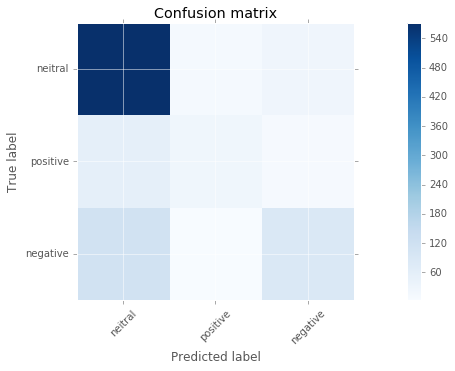

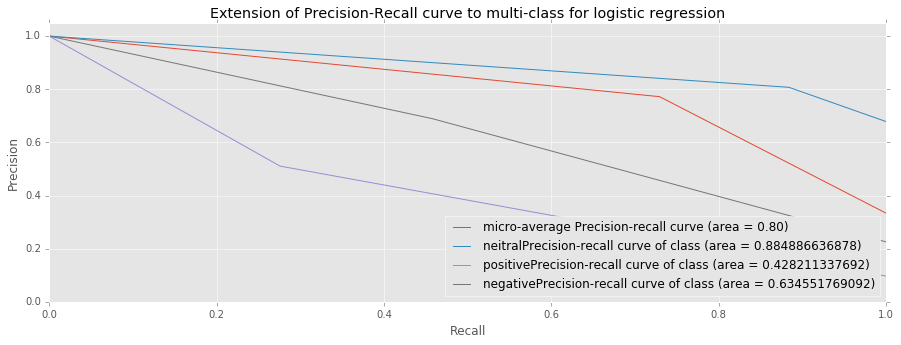

ROC draw


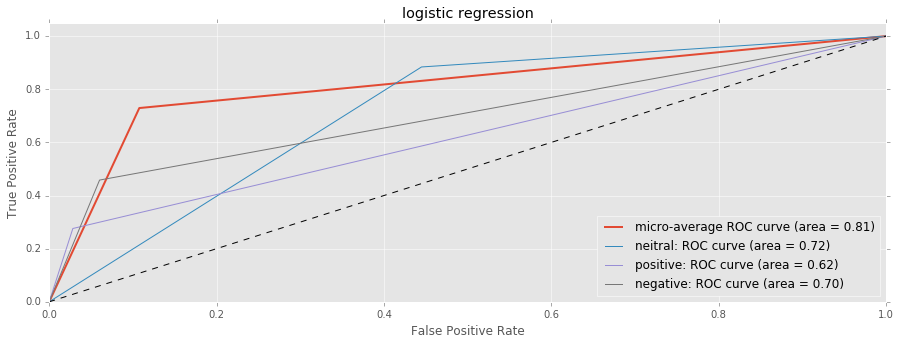

In [22]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(penalty='l2', solver='newton-cg', n_jobs=4, multi_class='ovr',
                             C=9.069584485718828)
    
log_clf = OneVsRestClassifier(log_clf)
print "fitting"
log_clf.fit(res_data['X_train'], res_data['Y_train_bin'])

print "prediction"
dpred = log_clf.predict(cont_valid_x)
examine_one_classifier(dpred, cont_valid_y, 'logistic regression', class_labels=['neitral', 'positive', 'negative'])

In [25]:
import pickle

type(log_clf)
f = open('/Users/Kseniya/diplom/src/text_preprocess/sentitrigram_linis_news_log_clf.obj_model', 'w')
pickle.dump(log_clf, file=f, protocol=pickle.HIGHEST_PROTOCOL)
f.close()

Metrics
random forest
Accurancy
0.738068812431
Precision/Recall/F-measure micro
(0.7380688124306326, 0.7380688124306326, 0.73806881243063249, None)
Precision/Recall/F-measure macro
(0.76476675854178577, 0.45815137011028423, 0.48534039986807903, None)
[[598   4   9]
 [ 76  10   1]
 [146   0  57]]
Normalized confusion matrix
[[ 0.98  0.01  0.01]
 [ 0.87  0.11  0.01]
 [ 0.72  0.    0.28]]
Precision/Recall
0
1
2


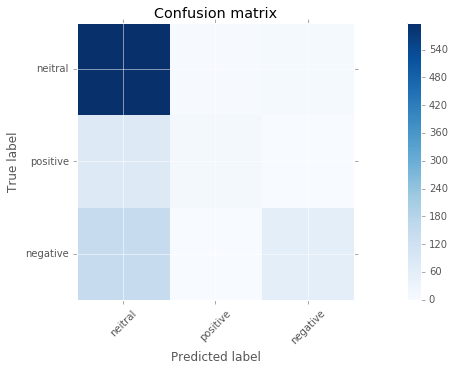

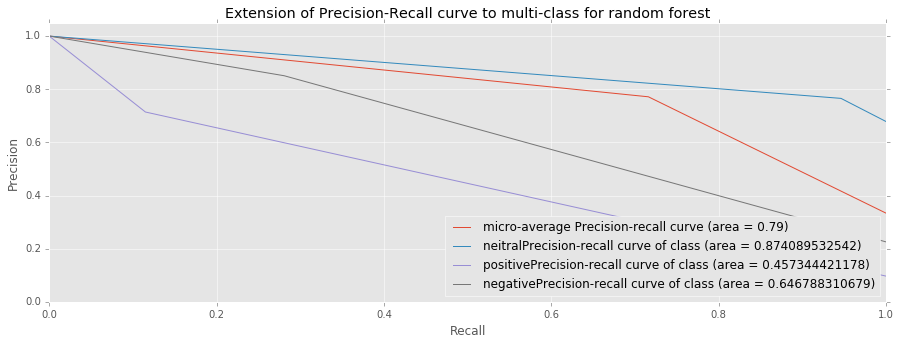

ROC draw


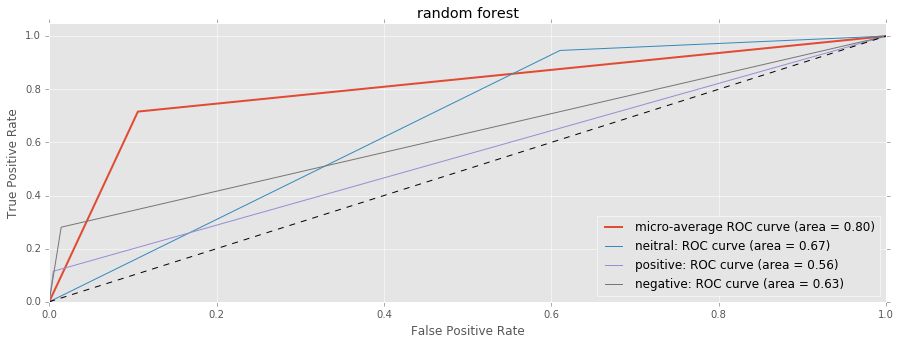

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=4,
                            n_estimators = 1000)
                            #max_depth = 40,
                            #min_samples_split = 6,
                            #min_samples_leaf = 5,
                            #min_weight_fraction_leaf = 0.3727357424428065)
clf = OneVsRestClassifier(clf)
clf.fit(res_data['X_train'], res_data['Y_train_bin'])
dpred = clf.predict(cont_valid_x)
pred_class = np.argmax(dpred, axis=1)

examine_one_classifier(dpred, cont_valid_y, 'random forest', class_labels=['neitral', 'positive', 'negative'])
    